# calculate catenary

http://svrmoorings.weebly.com/catenary-calculation.html 

| Input water depth and forces on mooring line | symbol |
| --- | --- |
waterdepth + distance between sealevel and the fairlead	| d
force applied to the mooring-line at the fairlead	| F
normalized thread diameter	| D
density of the steel material in air	| rhoSteel
output	
horizontal distance between the fairled and the touchdown 	| X
weight of the suspended chain 	| V
cross sectional area of the thread	| A
unit weight of the mooring line in water	| w
normalized horizontal tension component	| To
length of the suspended mooring line	| S
catenary shape parameter 	| a
upper angle of incidence of chain with horizontal in degrees	| ɸs upAngle
lower angle of incidence of chain with horizontal in degrees	| ɸ1 lowAngle
Axial Load on suction Pile	| Pa

In [1]:
import math

In [68]:
d= 1365 #m
F = 82 #t
D=0.38 #m
rhoSteel = 7.8 #t/m3

A=D**2*math.pi/4 #m2
w= (rhoSteel-1)*A #t/m
w=0.0451
S=(d*((2*F/w)-d))**0.5
X=(F/w-d)*math.log((S+F/w)/(F/w-d))
V=S*w
To=(F**2-V**2)**0.5
a=1/((rhoSteel*9.81*A)/To)
upAngle = math.degrees(math.acos((F-(w*d))/F))
lowAngle = math.degrees(math.atan((w*d)/To))
Pa = -((math.sin(math.radians(lowAngle))*F*9.81))/1000

In [69]:
print(f"For Given inputs \n\
waterdepth {d}m \n\
top force applied {F}t \n\
OD {D}m \n\
density of the steel material in air {rhoSteel} \n\n\
outputs are \n\
horizontal distance to touchdown {X}m \n\
weight of the suspended pipe {V}t \n\
cross sectional area of pipe {A}m2 \n\
unit weight of the pipe in water {w}t/m \n\
normalized horizontal tension component {To}t \n\
length of the suspended line {S}m \n\
catenary shape parameter {a} \n\
upper angle of incidence of chain with horizontal {upAngle}deg \n\
lower angle of incidence of chain with horizontal {lowAngle}deg \n\
Axial Load on suction Pile {Pa}MN ")

For Given inputs 
waterdepth 1365m 
top force applied 82t 
OD 0.38m 
density of the steel material in air 7.8 

outputs are 
horizontal distance to touchdown 936.5182649883043m 
weight of the suspended pipe 79.41201242727702t 
cross sectional area of pipe 0.11341149479459153m2 
unit weight of the pipe in water 0.0451t/m 
normalized horizontal tension component 20.4385t 
length of the suspended line 1760.7985017134595m 
catenary shape parameter 2.3552029395098266 
upper angle of incidence of chain with horizontal 75.56686450125403deg 
lower angle of incidence of chain with horizontal 71.63376485132638deg 
Axial Load on suction Pile -0.7634443424808048MN 


In [70]:
tmp100=a*(math.cosh(X/a))
# print(tmp100)
point=[]
for i in range(101):
    x=X/100*i
    y=d/100*i
#     print(x,y)
    tmp=a*(math.cosh(x/a))
#     print(tmp)
    dd=(tmp/tmp100)*y
#     print(dd)
    point.append({"x":x, "z":dd})

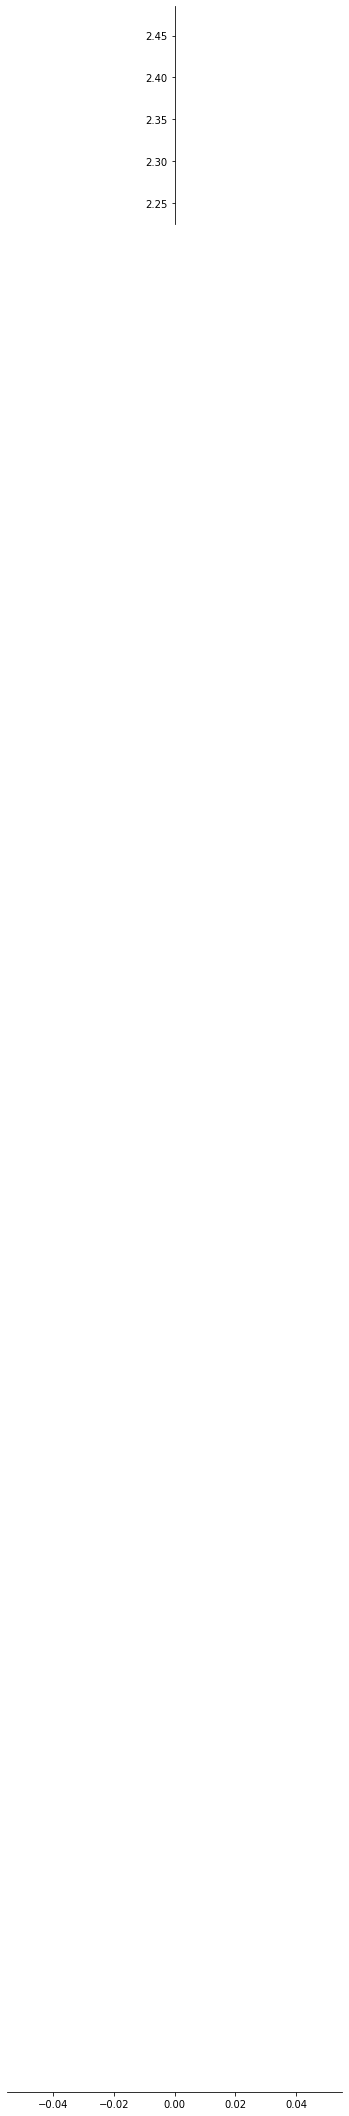

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0,X,1)

# the function, which is y = x^2 here
y = a*(math.cosh(x/a))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()